# E-commerce Behavior Analysis: Main Analysis

This notebook implements the core components of our e-commerce analysis system, including:
1. Recommendation System
2. User Segmentation
3. A/B Testing
4. Advanced Analytics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

# Import custom modules
from recommendation_system import RecommendationSystem
from user_segmentation import UserSegmentation
from ab_testing import ABTesting

## 1. Data Loading and Preparation

In [3]:
# https://drive.google.com/file/d/1NffQl6Gg6dard9iSGHOSiBZ3ZobDgw3J/view?usp=sharing
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/capstone/data/raw/reduced_file02.csv')

# Display basic information
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1500000, 9)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


## 2. Recommendation System Implementation

In [4]:
# Initialize and fit the recommendation system
rec_system = RecommendationSystem(use_gpu=True, batch_size=10000, timeout=14000)  # Adjust batch_size based on your memory

try:
    # Process your data
    rec_system.fit(df)
except TimeoutError as e:
    print(f"Processing timed out: {e}")
    print("Progress has been saved. You can resume later.")

# Get recommendations for a sample user
sample_user = df['user_id'].iloc[0]
recommendations = rec_system.get_hybrid_recommendations(sample_user, n_recommendations=5)
print(f"Recommendations for user {sample_user}:")
print(recommendations)

Initial memory usage: 0.50 GB
Creating mappings...
Creating user mappings...
Creating item mappings...
Processing data in batches...


Processing batches:   0%|          | 0/150 [00:00<?, ?it/s]

Memory usage after batch 0: 0.53 GB
Memory usage after batch 10: 0.53 GB
Memory usage after batch 20: 0.53 GB
Memory usage after batch 30: 0.53 GB
Memory usage after batch 40: 0.53 GB
Memory usage after batch 50: 0.53 GB
Memory usage after batch 60: 0.53 GB
Memory usage after batch 70: 0.53 GB
Memory usage after batch 80: 0.53 GB
Memory usage after batch 90: 0.53 GB
Memory usage after batch 100: 0.53 GB
Memory usage after batch 110: 0.53 GB
Memory usage after batch 120: 0.53 GB
Memory usage after batch 130: 0.53 GB
Memory usage after batch 140: 0.53 GB
Memory usage after creating user-item matrix: 0.53 GB
Calculating similarity matrices...
Calculating item similarities...


Processing item chunks:   0%|          | 0/149 [00:00<?, ?it/s]

Memory usage during item similarity calculation: 0.81 GB
Memory usage during item similarity calculation: 2.20 GB
Memory usage during item similarity calculation: 3.58 GB
Memory usage during item similarity calculation: 4.97 GB
Memory usage during item similarity calculation: 6.35 GB
Memory usage during item similarity calculation: 7.74 GB
Memory usage during item similarity calculation: 9.13 GB
Memory usage during item similarity calculation: 10.51 GB
Memory usage during item similarity calculation: 11.90 GB
Memory usage during item similarity calculation: 13.28 GB
Memory usage during item similarity calculation: 14.67 GB
Memory usage during item similarity calculation: 16.06 GB
Memory usage during item similarity calculation: 17.44 GB
Memory usage during item similarity calculation: 18.83 GB
Memory usage during item similarity calculation: 20.21 GB
Memory usage during item similarity calculation: 21.60 GB
Memory usage during item similarity calculation: 22.99 GB
Memory usage during i

## 3. User Segmentation Analysis

In [5]:
# Initialize and fit user segmentation
user_seg = UserSegmentation(n_clusters=4)
user_seg.fit(df)

# Get cluster characteristics
cluster_chars = user_seg.get_cluster_characteristics()
print("Cluster Characteristics:")
cluster_chars.head()

Cluster Characteristics:


,recency,frequency,monetary,unique_products,unique_categories,session_count,size
cluster,,,,,,,
0,1.000000,3.986725,1159.161976,2.690556,0.825545,1.165122,30432
1,0.019546,17.852316,5333.726270,10.810307,1.854922,2.559058,32231
2,0.033659,60.861564,18943.024883,34.242400,3.386808,4.710641,3684
3,0.000000,3.582740,1038.674285,2.415979,0.788289,1.204757,161626


from matplotlib import pyplot as plt
_df_0['recency'].plot(kind='hist', bins=20, title='recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['monetary'].plot(kind='hist', bins=20, title='monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['unique_products'].plot(kind='hist', bins=20, title='unique_products')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='recency', y='frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='frequency', y='monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='monetary', y='unique_products', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='unique_products', y='unique_categories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['recency'].plot(kind='line', figsize=(8, 4), title='recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['monetary'].plot(kind='line', figsize=(8, 4), title='monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['unique_products'].plot(kind='line', figsize=(8, 4), title='unique_products')
plt.gca().spines[['top', 'right']].set_visible(False)

## 4. A/B Testing Analysis

             metric test_type  statistic   p_value  significant  control_mean  \
0   conversion_rate    t-test  -1.012487  0.311428        False      0.100000   
1   avg_order_value    t-test  -2.044478  0.041037         True    101.977916   
2  session_duration    t-test  -3.798568  0.000150         True     15.069100   

   treatment_mean  effect_size  
0        0.114000     0.045280  
1      103.782251     0.091432  
2       15.901106     0.169877  


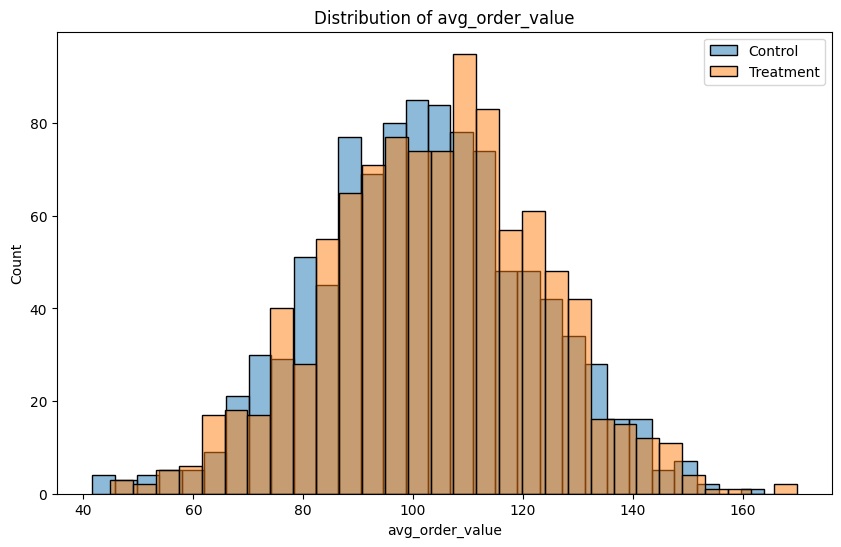

In [7]:
import numpy as np
import pandas as pd

np.random.seed(42)
n_users = 1000

# Simulate user IDs
user_ids = np.arange(1, n_users + 1)

# Simulate metrics
def simulate_group_data(user_ids, conversion_rate, avg_order_value_mean, session_duration_mean):
    return pd.DataFrame({
        'user_id': user_ids,
        'conversion_rate': np.random.binomial(1, conversion_rate, len(user_ids)),
        'avg_order_value': np.random.normal(avg_order_value_mean, 20, len(user_ids)),
        'session_duration': np.random.normal(session_duration_mean, 5, len(user_ids))
    })

control_data = simulate_group_data(user_ids, conversion_rate=0.10, avg_order_value_mean=100, session_duration_mean=15)
treatment_data = simulate_group_data(user_ids, conversion_rate=0.13, avg_order_value_mean=105, session_duration_mean=16)

# Run A/B test
ab_test = ABTesting()
ab_test.load_data(control_data, treatment_data)
ab_test.calculate_metrics(['conversion_rate', 'avg_order_value', 'session_duration'])
report = ab_test.generate_report(['conversion_rate', 'avg_order_value', 'session_duration'])
print(report)

# Optional: Visualize one of the metrics
ab_test.plot_metric_distribution('avg_order_value')

## 5. Conclusions and Next Steps

Summarize findings and outline next steps here.

Based on your A/B test results and the histogram visualization, here’s a summary of conclusions and next steps you can include in your report or notebook:

Conclusions

1. Conversion Rate

  1. Result: No statistically significant difference between control and treatment (p_value = 0.31, not significant).
  2. Interpretation: The treatment did not lead to a meaningful change in conversion rate compared to the control group.

2. Average Order Value
   1. Result: Statistically significant increase in the treatment group (p_value = 0.041, significant).
   2. Interpretation: The treatment led to a higher average order value, suggesting users in the treatment group spent more per order.

3. Session Duration
   1. Result: Statistically significant increase in the treatment group (p_value = 0.00015, significant).
   2. Interpretation: The treatment increased the average session duration, indicating users engaged longer with the platform.

4. Visualization
The histogram of avg_order_value shows a clear rightward shift for the treatment group, supporting the statistical findings.

Next Steps

1. Business Recommendations
   * Consider rolling out the treatment to a larger user base, as it increases order value and engagement without negatively impacting conversion rate.
   * Further investigate why session duration and order value increased—was it due to UI changes, promotions, or other factors?

2. Further Analysis
   * Segment results by user demographics, device type, or acquisition channel to see if effects are consistent across segments.
   * Analyze other metrics (e.g., retention, repeat purchase rate) to ensure there are no negative side effects.

3. Experiment Improvements
   * Increase sample size for more power, especially for conversion rate.
   * Run the experiment for a longer period to capture long-term effects.

4. Validation
   * Check for any experiment biases or data quality issues.
   * Validate results with additional statistical tests or bootstrapping.
